In [1]:
import eval
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
doable_pre = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-3.5-turbo-pre-1.0_checked.csv")
undoable_pre = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-3.5-turbo-pre-1.0_checked.csv")


doable_post = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-3.5-turbo-post-1.0_checked.csv")
undoable_post = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-3.5-turbo-post-1.0_checked.csv")


doable_mid_no_step = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-3.5-turbo-mid_no_step-1.0_checked.csv")
undoable_mid_no_step = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-3.5-turbo-mid_no_step-1.0_checked.csv")


doable_mix = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-3.5-turbo-mix-1.0_checked.csv")
undoable_mix = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-3.5-turbo-mix-1.0_checked.csv")

In [3]:
# 给这两个数据集算出来的probability画直方图 用matplotlib画.两组数据画在一张图上
# 画直方图
def draw_prob_hist(ax,doable, undoable,prompt_type="pre",number="(a)"):
    #plt.figure(figsize=(10, 6))
    ax.hist(doable["probability"],  alpha=0.5, label='Doable Tasks')
    ax.hist(undoable["probability"], alpha=0.5, label='Undoable Tasks')

    # 添加图例
    ax.legend(loc='upper left',fontsize=16,)
    ax.set_xlabel('Value',fontsize=16)
    ax.set_ylabel('Frequency',fontsize=16)
    ax.set_title(number+" "+'Probabilistic Histogram (using '+prompt_type+' prompt) ', fontsize=20,fontweight='bold', fontname='Times New Roman')
    ax.tick_params(axis='both', which='major', labelsize=12)  # 设置主刻度标签字体大小
    ax.tick_params(axis='both', which='minor', labelsize=10)  # 设置次刻度标签字体大小

def calculate_metrics(doable, undoable, prompt_type="pre"):
    print("Using "+prompt_type+" prompt")
    df_concated = pd.concat([doable, undoable], axis=0)
    auroc = eval.calculate_auroc(df_concated)
    ece = eval.calculate_ece(df_concated)
    brier_score = eval.calculate_brier_score(df_concated)
    ks_stat = eval.calculate_KS_stat(df_concated)

    rtn = {
        'ECE': ece,
        'Brier': brier_score,
        'AUROC': auroc,
        'KS Stat': ks_stat
    }
    print(rtn)
    return rtn


In [13]:
calculate_metrics(doable_pre, undoable_pre, "pre")
calculate_metrics(doable_post, undoable_post, "post")
calculate_metrics(doable_mid_no_step, undoable_mid_no_step, "mid_no_step")
calculate_metrics(doable_mix, undoable_mix, "mix")


Using pre prompt
{'ECE': 0.12537833511205979, 'Brier': 0.17275481430096049, 'AUROC': 0.8584028707316378, 'KS Stat': 0.5753407569845926}
Using post prompt
{'ECE': 0.14020330843116327, 'Brier': 0.18790221024546425, 'AUROC': 0.8550760402130264, 'KS Stat': 0.5399943041038932}
Using mid_no_step prompt
{'ECE': 0.14606723585912487, 'Brier': 0.16734391675560298, 'AUROC': 0.8649534360493265, 'KS Stat': 0.6327126705208898}
Using mix prompt
{'ECE': 0.10352988260405545, 'Brier': 0.14979282070437566, 'AUROC': 0.8857411784809046, 'KS Stat': 0.6223068379232762}


{'ECE': 0.10352988260405545,
 'Brier': 0.14979282070437566,
 'AUROC': 0.8857411784809046,
 'KS Stat': 0.6223068379232762}

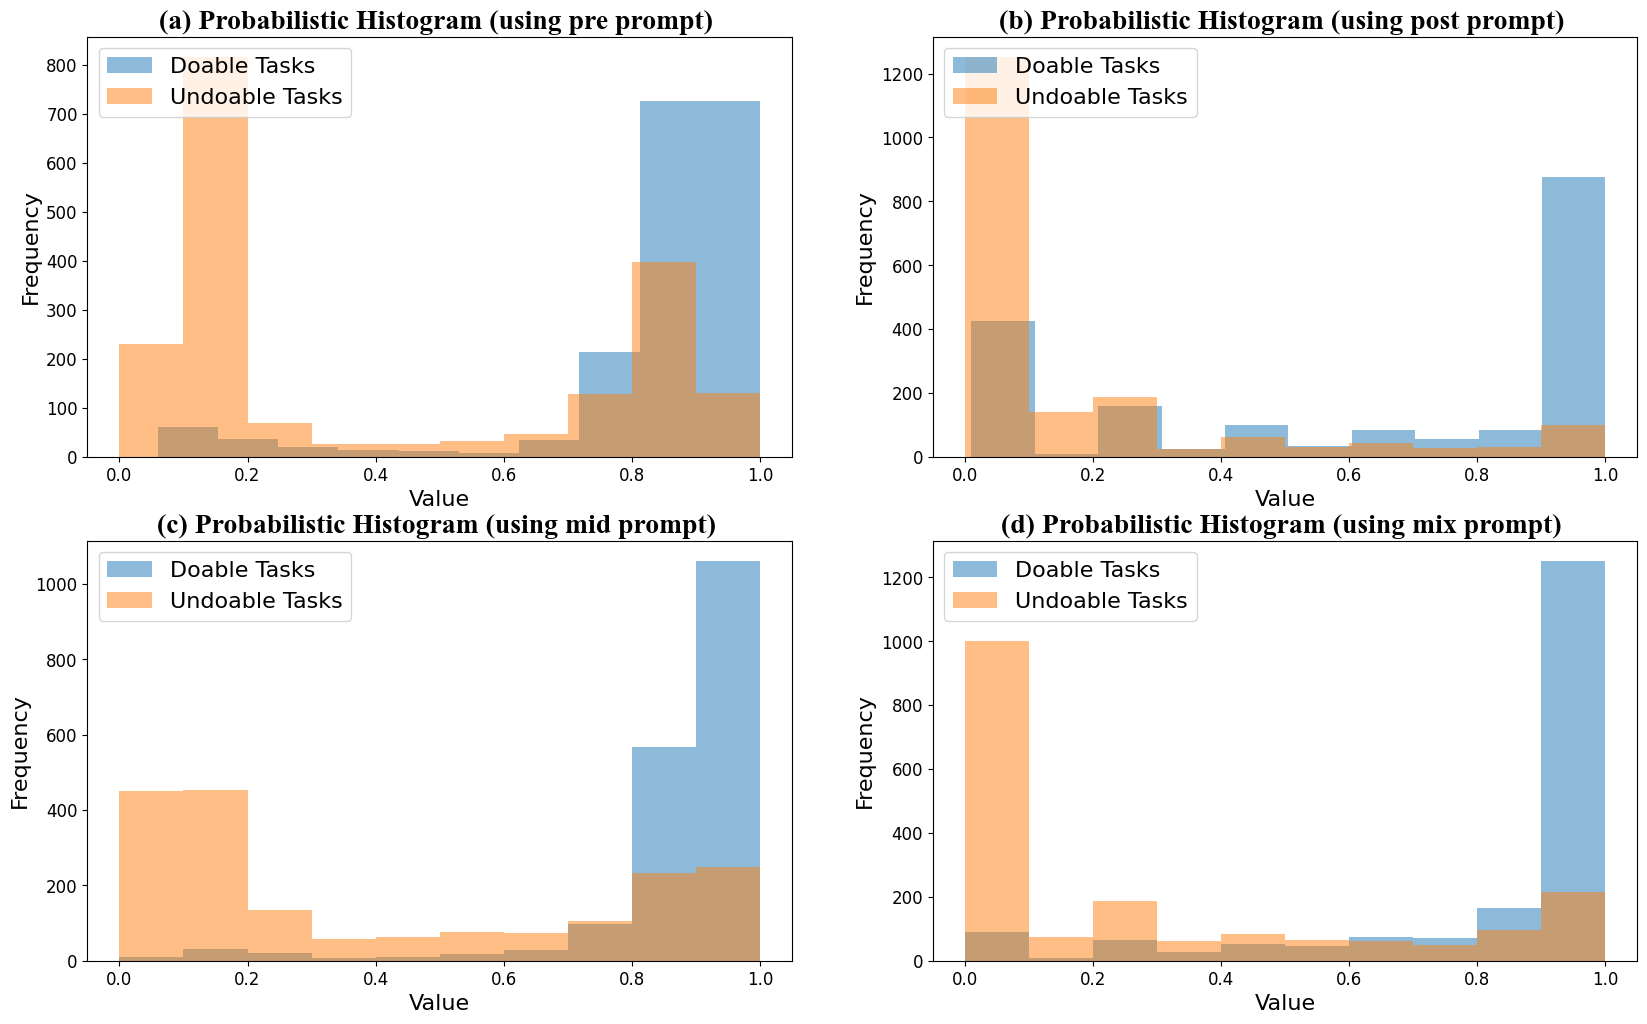

In [5]:
#fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# 画 3个图并排的图
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

draw_prob_hist(axs[0, 0],doable_pre, undoable_pre,"pre","(a)")
draw_prob_hist(axs[0, 1],doable_post, undoable_post,"post","(b)")
draw_prob_hist(axs[1, 0],doable_mid_no_step, undoable_mid_no_step,"mid","(c)")
draw_prob_hist(axs[1, 1],doable_mix, undoable_mix,"mix","(d)")


plt.show()


# Below is the Palm Model Data

In [ ]:
doable_pre_palm2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-palm2-pre-1.0temperature=0.7_checked.csv")
undoable_pre_palm2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-palm2-pre-1.0temperature=0.7_checked.csv")


doable_post_palm2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-palm2-post-1.0temperature=0.7_checked.csv")
undoable_post_palm2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-palm2-post-1.0temperature=0.7_checked.csv")



doable_mid_no_step_palm2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-palm2-mid_no_step-1.0temperature=0.7_checked.csv")
undoable_mid_no_step_palm2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-palm2-mid_no_step-1.0temperature=0.7_checked.csv")


doable_mix_palm2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-palm2-mix-1.0temperature=0.7_checked.csv")
undoable_mix_palm2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-palm2-mix-1.0temperature=0.7_checked.csv")


In [9]:
calculate_metrics(doable_pre_palm2, undoable_pre_palm2, "pre")
calculate_metrics(doable_post_palm2, undoable_post_palm2, "post")
calculate_metrics(doable_mid_no_step_palm2, undoable_mid_no_step_palm2, "mid_no_step")
calculate_metrics(doable_mix_palm2, undoable_mix_palm2, "mix")

Using pre prompt
{'ECE': 0.02581461040549625, 'Brier': 0.11105173258015072, 'AUROC': 0.912899353515792, 'KS Stat': 0.7254355936547717}
Using post prompt
{'ECE': 0.03132943776182849, 'Brier': 0.11471164219453411, 'AUROC': 0.9101311480078603, 'KS Stat': 0.7156574488081338}
Using mid_no_step prompt
{'ECE': 0.03969098185699041, 'Brier': 0.12245824291355388, 'AUROC': 0.8977697718793609, 'KS Stat': 0.6959655967875146}
Using mix prompt
{'ECE': 0.06930715037353255, 'Brier': 0.13224179782411954, 'AUROC': 0.895508643522342, 'KS Stat': 0.6672884686583317}


{'ECE': 0.06930715037353255,
 'Brier': 0.13224179782411954,
 'AUROC': 0.895508643522342,
 'KS Stat': 0.6672884686583317}

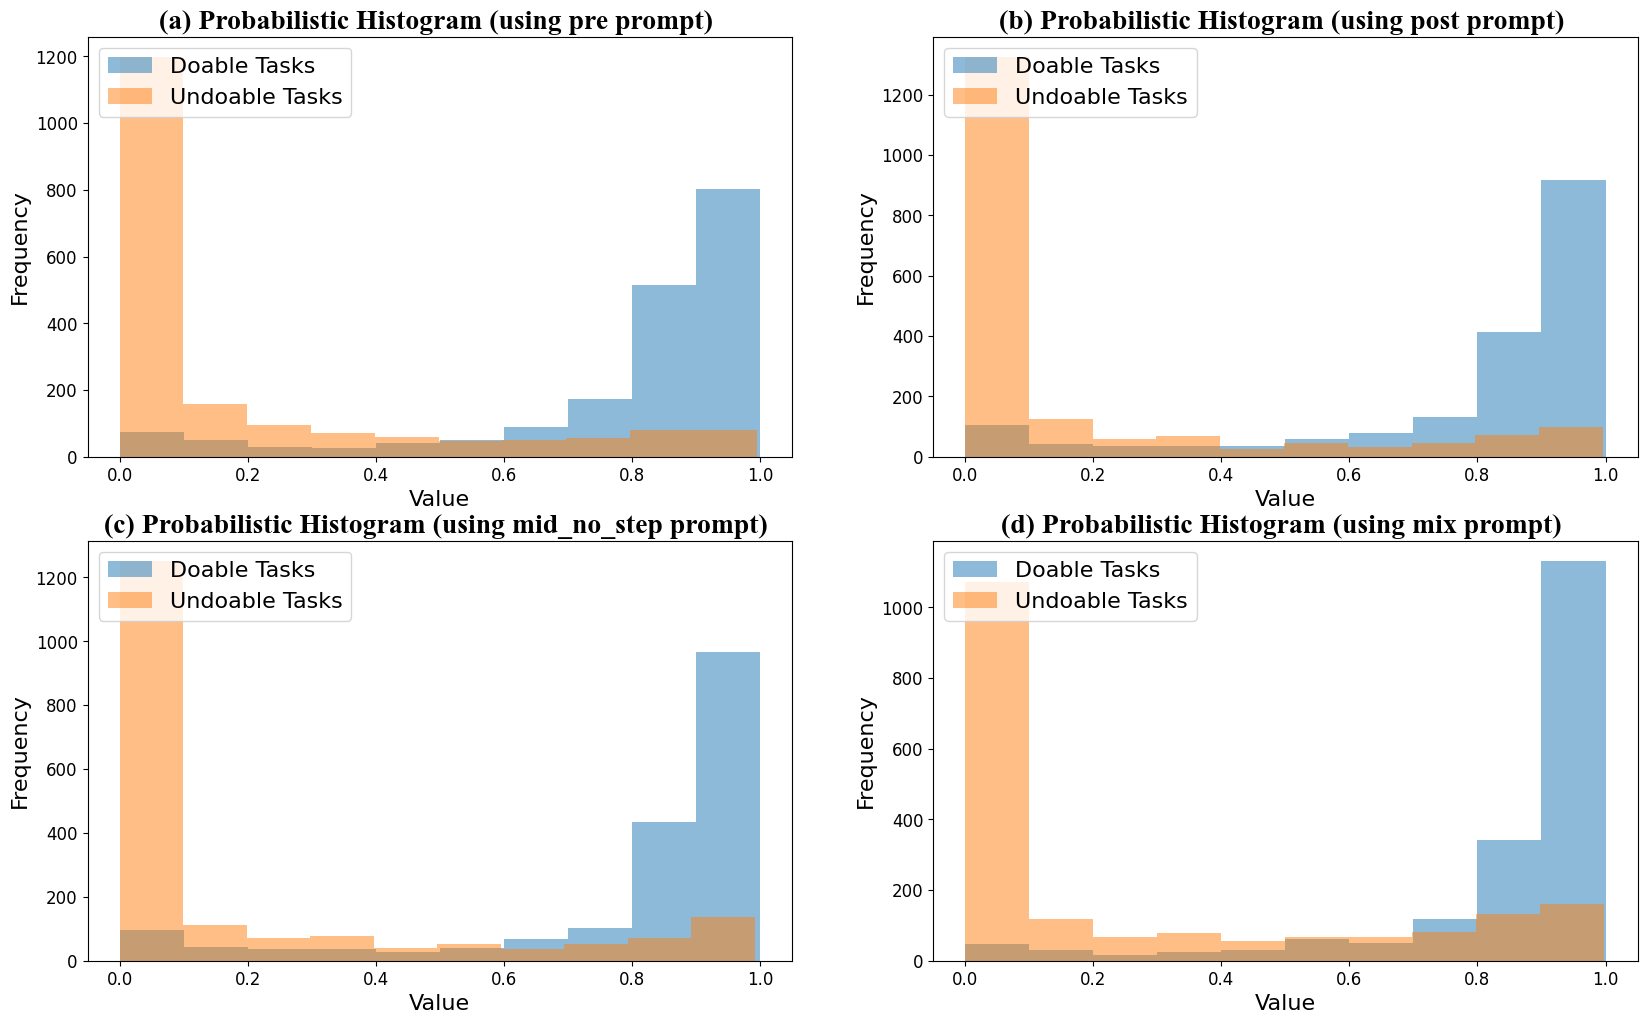

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

draw_prob_hist(axs[0, 0],doable_pre_palm2, undoable_pre_palm2,"pre","(a)")
draw_prob_hist(axs[0, 1],doable_post_palm2, undoable_post_palm2,"post","(b)")
draw_prob_hist(axs[1, 0],doable_mid_no_step_palm2, undoable_mid_no_step_palm2,"mid_no_step","(c)")
draw_prob_hist(axs[1, 1],doable_mix_palm2, undoable_mix_palm2,"mix","(d)")


plt.show()

# llama2 70b chat

In [10]:
doable_pre_llama2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-llama2-70b-pre-1.0_checked.csv")
undoable_pre_llama2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-llama2-70b-pre-1.0_checked.csv")


doable_post_llama2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-llama2-70b-post-1.0_checked.csv")
undoable_post_llama2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-llama2-70b-post-1.0_checked.csv")


doable_mid_no_step_llama2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-llama2-70b-mid_no_step-1.0_checked.csv")
undoable_mid_no_step_llama2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-llama2-70b-mid_no_step-1.0_checked.csv")


doable_mix_llama2 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-llama2-70b-mix-1.0_checked.csv")
undoable_mix_llama2 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-llama2-70b-mix-1.0_checked.csv")


0       1
1       1
2       1
3       1
4       1
       ..
1845    1
1846    1
1847    1
1848    1
1849    1
Name: label, Length: 1850, dtype: int64


In [14]:
calculate_metrics(doable_pre_llama2, undoable_pre_llama2, "pre")
calculate_metrics(doable_post_llama2, undoable_post_llama2, "post")
calculate_metrics(doable_mid_no_step_llama2, undoable_mid_no_step_llama2, "mid_no_step")
calculate_metrics(doable_mix_llama2, undoable_mix_llama2, "mix")

Using pre prompt
{'ECE': 0.03250533617929566, 'Brier': 0.1065846627534685, 'AUROC': 0.9270516617776892, 'KS Stat': 0.7233753880329222}
Using post prompt
{'ECE': 0.043988687299893275, 'Brier': 0.11862061498399146, 'AUROC': 0.913996952695583, 'KS Stat': 0.7174841226896022}
Using mid_no_step prompt
{'ECE': 0.06996104589114187, 'Brier': 0.13140133724653147, 'AUROC': 0.8964367897929542, 'KS Stat': 0.6882465183835047}
Using mix prompt
{'ECE': 0.14816862326574173, 'Brier': 0.19084864674493066, 'AUROC': 0.8408303192549769, 'KS Stat': 0.5701067980520035}


{'ECE': 0.14816862326574173,
 'Brier': 0.19084864674493066,
 'AUROC': 0.8408303192549769,
 'KS Stat': 0.5701067980520035}

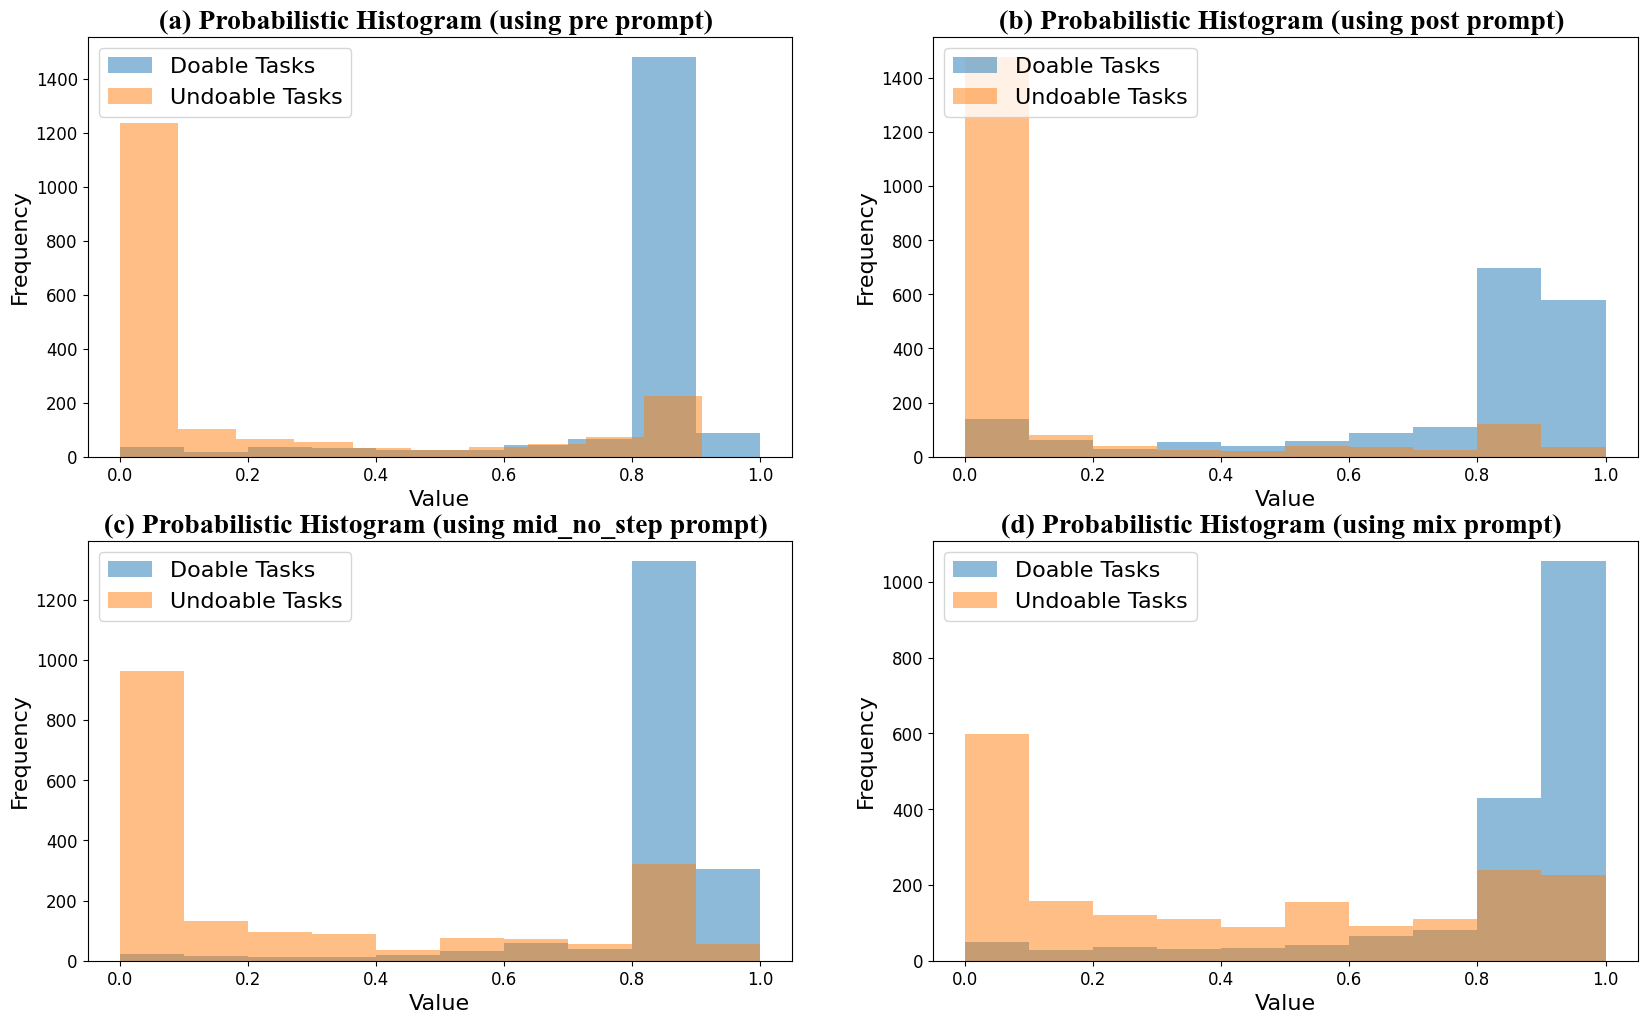

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

draw_prob_hist(axs[0, 0],doable_pre_llama2, undoable_pre_llama2,"pre","(a)")
draw_prob_hist(axs[0, 1],doable_post_llama2, undoable_post_llama2,"post","(b)")
draw_prob_hist(axs[1, 0],doable_mid_no_step_llama2, undoable_mid_no_step_llama2,"mid_no_step","(c)")
draw_prob_hist(axs[1, 1],doable_mix_llama2, undoable_mix_llama2,"mix","(d)")


plt.show()

# Below are the content of GPT-4

In [ ]:
doable_pre_gpt4 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-4-pre-1.0_checked.csv")
undoable_pre_gpt4 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-4-pre-1.0_checked.csv")


doable_post_gpt4 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-4-post-1.0_checked.csv")
undoable_post_gpt4 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-4-post-1.0_checked.csv")


doable_mid_no_step_gpt4 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-4-mid_no_step-1.0_checked.csv")
undoable_mid_no_step_gpt4 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-4-mid_no_step-1.0_checked.csv")

doable_mix_gpt4 = pd.read_csv("../dataset/output/doable_task_2k/doable_task_2k-gpt-4-mix-1.0_checked.csv")
undoable_mix_gpt4 = pd.read_csv("../dataset/output/undoable_task_2k/undoable_task_2k-gpt-4-mix-1.0_checked.csv")


In [20]:
calculate_metrics(doable_pre_gpt4, undoable_pre_gpt4, "pre")
calculate_metrics(doable_post_gpt4, undoable_post_gpt4, "post")
calculate_metrics(doable_mid_no_step_gpt4, undoable_mid_no_step_gpt4, "mid_no_step")
calculate_metrics(doable_mix_gpt4, undoable_mix_gpt4, "mix")


Using pre prompt
{'ECE': 0.040927427961579534, 'Brier': 0.05549563287086447, 'AUROC': 0.9647134964258252, 'KS Stat': 0.8920809956426394}
Using post prompt
{'ECE': 0.05237086446104594, 'Brier': 0.060651422625400214, 'AUROC': 0.9667467889385697, 'KS Stat': 0.8781226326431806}
Using mid_no_step prompt
{'ECE': 0.05112913553895409, 'Brier': 0.060857684098185705, 'AUROC': 0.95516204824424, 'KS Stat': 0.8838771964799362}
Using mix prompt
{'ECE': 0.04766915688367122, 'Brier': 0.056339867662753465, 'AUROC': 0.9673193688947115, 'KS Stat': 0.8802574545040298}


{'ECE': 0.04766915688367122,
 'Brier': 0.056339867662753465,
 'AUROC': 0.9673193688947115,
 'KS Stat': 0.8802574545040298}

1850


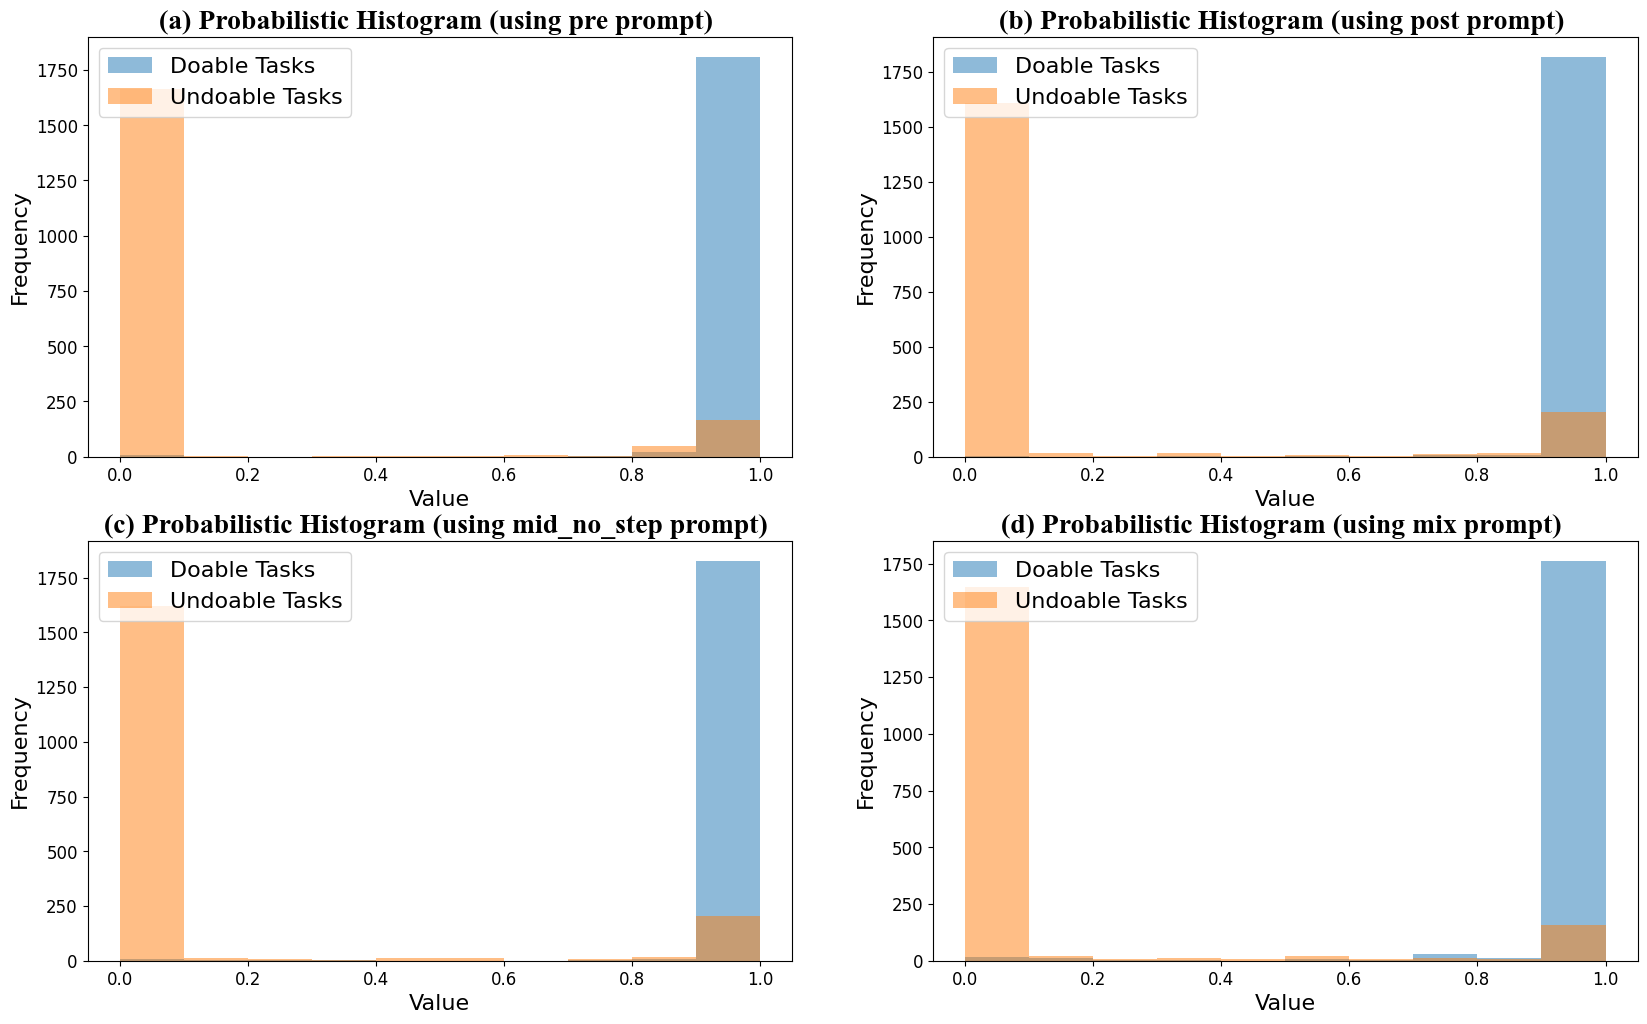

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
print(len(doable_mix_gpt4))
draw_prob_hist(axs[0, 0],doable_pre_gpt4, undoable_pre_gpt4,"pre","(a)")
draw_prob_hist(axs[0, 1],doable_post_gpt4, undoable_post_gpt4,"post","(b)")
draw_prob_hist(axs[1, 0],doable_mid_no_step_gpt4, undoable_mid_no_step_gpt4,"mid_no_step","(c)")
draw_prob_hist(axs[1, 1],doable_mix_gpt4, undoable_mix_gpt4,"mix","(d)")


plt.show()